In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pathlib
from lb2jpsil import lorentz
import random
from typing import Tuple
from scipy import optimize, integrate, stats
import time

In [2]:
def scalar_product(v1, v2):
    return v1[0] * v2[0] + v1[1] * v2[1] + v1[2] * v2[2]

In [3]:
## in eV
m_electron = 0.511e6
m_lambda = 1116e6

## in eV/T
bohr_magneton = 5.788e-5

## in eV s
hbar = 6.582e-16

## in m/s
c = 299792458.

In [4]:
import ROOT

Welcome to JupyROOT 6.24/06


In [10]:
f = ROOT.TF1Convolution("expo", "gaus", -1, 6, True)

In [11]:
a = ROOT.TF1("f", f, 0., 5., f.GetNpar());

In file included from input_line_116:1:
/home/adegenna/.local/opt/root-6.24.06/include/CPyCppyy/API.h:30:10: fatal error: 'Python.h' file not found
#include "Python.h"
         ^~~~~~~~~~
In file included from input_line_117:1:
/home/adegenna/.local/opt/root-6.24.06/include/CPyCppyy/API.h:30:10: fatal error: 'Python.h' file not found
#include "Python.h"
         ^~~~~~~~~~


In [18]:
a.SetParameters(1., -0.3, 0., 1.)

In [19]:
xs = np.linspace(-1,6)

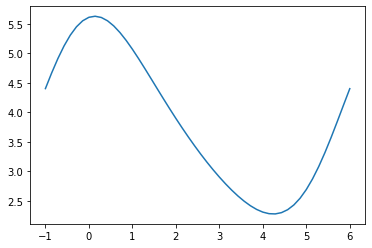

In [20]:
plt.plot(xs, [a.Eval(x) for x in xs])

In [21]:
def scalar_product(v1, v2):
    return v1[0] * v2[0] + v1[1] * v2[1] + v1[2] * v2[2]

In [22]:
## in eV
m_electron = 0.511e6
m_lambda = 1116e6

## in eV/T
bohr_magneton = 5.788e-5

## in eV s
hbar = 6.582e-16

## in m/s
c = 299792458.

In [23]:
## Assuming EDM is 0
def particle_magneton(m_particle):
    return bohr_magneton * m_electron / m_lambda

def phi_rot(g: float, Dy: float, beta: float, m_particle: float):
    muB = particle_magneton(m_particle)
    return g * Dy * muB / (beta * hbar * c)

In [24]:
def pdf(cos_theta, phi, sz=1, g=1.226, Dy=4, beta=1.):
    alpha = 0.732
    
    Phi_rot = phi_rot(g, Dy, beta, m_lambda)
    
    s = np.array([
        - sz * np.sin(Phi_rot),
        0,
        sz * np.cos(Phi_rot)
    ])
    
    k_hat = np.array([
        np.sin(np.arccos(cos_theta)) * np.cos(phi),
        np.sin(np.arccos(cos_theta)) * np.sin(phi),
        cos_theta
    ])
    
    return 1 + alpha * scalar_product(s, k_hat)

In [26]:
stats.norm.pdf(0, 0, 1)

0.3989422804014327

In [38]:
def h(ctheta, phi):
    y, _ = integrate.quad(lambda t: pdf(t, phi) * stats.norm.pdf(ctheta - t, 0, 0.253), -1 ,1)
    return y

In [59]:
def convoluted(ctheta, phi):
    y, _ = integrate.quad(lambda t: h(ctheta, t) * stats.norm.pdf(phi - t, 0, 1.083), -np.pi ,np.pi)
    return y

In [61]:
convoluted(1,0)

0.6442844786715555

In [62]:
h(1,0)

0.5893869089051916

In [63]:
pdf(1,0)

1.578878029208671

In [42]:
h(np.linspace,1)

0.6495017737517749

In [41]:
pdf(1,1)

1.578878029208671

In [43]:
theta_min = -1
theta_max = 1

phi_min = -np.pi
phi_max = np.pi

bins = 100

theta_list = np.linspace(theta_min, theta_max, bins)
phi_list = np.linspace(phi_min, phi_max, bins)

theta_grid, phi_grid = np.meshgrid(theta_list, phi_list)
ys = h(theta_grid, phi_grid)

/home/adegenna/apollo/lib/python3.6/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


TypeError: only size-1 arrays can be converted to Python scalars

In [56]:
for t, p in zip(theta_grid, phi_grid):
    for i, j in zip(t, p):
        print(i,j)

-1.0 -3.141592653589793
-0.9797979797979798 -3.141592653589793
-0.9595959595959596 -3.141592653589793
-0.9393939393939394 -3.141592653589793
-0.9191919191919192 -3.141592653589793
-0.898989898989899 -3.141592653589793
-0.8787878787878788 -3.141592653589793
-0.8585858585858586 -3.141592653589793
-0.8383838383838383 -3.141592653589793
-0.8181818181818181 -3.141592653589793
-0.797979797979798 -3.141592653589793
-0.7777777777777778 -3.141592653589793
-0.7575757575757576 -3.141592653589793
-0.7373737373737373 -3.141592653589793
-0.7171717171717171 -3.141592653589793
-0.696969696969697 -3.141592653589793
-0.6767676767676767 -3.141592653589793
-0.6565656565656566 -3.141592653589793
-0.6363636363636364 -3.141592653589793
-0.6161616161616161 -3.141592653589793
-0.5959595959595959 -3.141592653589793
-0.5757575757575757 -3.141592653589793
-0.5555555555555556 -3.141592653589793
-0.5353535353535352 -3.141592653589793
-0.5151515151515151 -3.141592653589793
-0.4949494949494949 -3.141592653589793
-0.4

0.21212121212121215 -2.8242600623180967
0.2323232323232325 -2.8242600623180967
0.2525252525252526 -2.8242600623180967
0.27272727272727293 -2.8242600623180967
0.29292929292929304 -2.8242600623180967
0.31313131313131315 -2.8242600623180967
0.3333333333333335 -2.8242600623180967
0.3535353535353536 -2.8242600623180967
0.3737373737373739 -2.8242600623180967
0.39393939393939403 -2.8242600623180967
0.41414141414141437 -2.8242600623180967
0.4343434343434345 -2.8242600623180967
0.4545454545454546 -2.8242600623180967
0.4747474747474749 -2.8242600623180967
0.49494949494949503 -2.8242600623180967
0.5151515151515154 -2.8242600623180967
0.5353535353535355 -2.8242600623180967
0.5555555555555556 -2.8242600623180967
0.5757575757575759 -2.8242600623180967
0.595959595959596 -2.8242600623180967
0.6161616161616164 -2.8242600623180967
0.6363636363636365 -2.8242600623180967
0.6565656565656568 -2.8242600623180967
0.6767676767676769 -2.8242600623180967
0.696969696969697 -2.8242600623180967
0.7171717171717173 -

-0.33333333333333326 -2.1895948797747042
-0.31313131313131304 -2.1895948797747042
-0.2929292929292928 -2.1895948797747042
-0.2727272727272727 -2.1895948797747042
-0.2525252525252525 -2.1895948797747042
-0.23232323232323226 -2.1895948797747042
-0.21212121212121204 -2.1895948797747042
-0.19191919191919182 -2.1895948797747042
-0.1717171717171716 -2.1895948797747042
-0.1515151515151515 -2.1895948797747042
-0.13131313131313127 -2.1895948797747042
-0.11111111111111105 -2.1895948797747042
-0.09090909090909083 -2.1895948797747042
-0.07070707070707061 -2.1895948797747042
-0.050505050505050386 -2.1895948797747042
-0.030303030303030276 -2.1895948797747042
-0.010101010101010055 -2.1895948797747042
0.010101010101010166 -2.1895948797747042
0.030303030303030498 -2.1895948797747042
0.05050505050505061 -2.1895948797747042
0.07070707070707072 -2.1895948797747042
0.09090909090909105 -2.1895948797747042
0.11111111111111116 -2.1895948797747042
0.1313131313131315 -2.1895948797747042
0.1515151515151516 -2.18

-0.5353535353535352 -1.5549296972313116
-0.5151515151515151 -1.5549296972313116
-0.4949494949494949 -1.5549296972313116
-0.4747474747474747 -1.5549296972313116
-0.4545454545454545 -1.5549296972313116
-0.43434343434343425 -1.5549296972313116
-0.41414141414141414 -1.5549296972313116
-0.3939393939393939 -1.5549296972313116
-0.3737373737373737 -1.5549296972313116
-0.3535353535353535 -1.5549296972313116
-0.33333333333333326 -1.5549296972313116
-0.31313131313131304 -1.5549296972313116
-0.2929292929292928 -1.5549296972313116
-0.2727272727272727 -1.5549296972313116
-0.2525252525252525 -1.5549296972313116
-0.23232323232323226 -1.5549296972313116
-0.21212121212121204 -1.5549296972313116
-0.19191919191919182 -1.5549296972313116
-0.1717171717171716 -1.5549296972313116
-0.1515151515151515 -1.5549296972313116
-0.13131313131313127 -1.5549296972313116
-0.11111111111111105 -1.5549296972313116
-0.09090909090909083 -1.5549296972313116
-0.07070707070707061 -1.5549296972313116
-0.050505050505050386 -1.5549

-0.6363636363636364 -0.9837310329422584
-0.6161616161616161 -0.9837310329422584
-0.5959595959595959 -0.9837310329422584
-0.5757575757575757 -0.9837310329422584
-0.5555555555555556 -0.9837310329422584
-0.5353535353535352 -0.9837310329422584
-0.5151515151515151 -0.9837310329422584
-0.4949494949494949 -0.9837310329422584
-0.4747474747474747 -0.9837310329422584
-0.4545454545454545 -0.9837310329422584
-0.43434343434343425 -0.9837310329422584
-0.41414141414141414 -0.9837310329422584
-0.3939393939393939 -0.9837310329422584
-0.3737373737373737 -0.9837310329422584
-0.3535353535353535 -0.9837310329422584
-0.33333333333333326 -0.9837310329422584
-0.31313131313131304 -0.9837310329422584
-0.2929292929292928 -0.9837310329422584
-0.2727272727272727 -0.9837310329422584
-0.2525252525252525 -0.9837310329422584
-0.23232323232323226 -0.9837310329422584
-0.21212121212121204 -0.9837310329422584
-0.19191919191919182 -0.9837310329422584
-0.1717171717171716 -0.9837310329422584
-0.1515151515151515 -0.9837310329

-0.07070707070707061 -0.412532368653205
-0.050505050505050386 -0.412532368653205
-0.030303030303030276 -0.412532368653205
-0.010101010101010055 -0.412532368653205
0.010101010101010166 -0.412532368653205
0.030303030303030498 -0.412532368653205
0.05050505050505061 -0.412532368653205
0.07070707070707072 -0.412532368653205
0.09090909090909105 -0.412532368653205
0.11111111111111116 -0.412532368653205
0.1313131313131315 -0.412532368653205
0.1515151515151516 -0.412532368653205
0.1717171717171717 -0.412532368653205
0.19191919191919204 -0.412532368653205
0.21212121212121215 -0.412532368653205
0.2323232323232325 -0.412532368653205
0.2525252525252526 -0.412532368653205
0.27272727272727293 -0.412532368653205
0.29292929292929304 -0.412532368653205
0.31313131313131315 -0.412532368653205
0.3333333333333335 -0.412532368653205
0.3535353535353536 -0.412532368653205
0.3737373737373739 -0.412532368653205
0.39393939393939403 -0.412532368653205
0.41414141414141437 -0.412532368653205
0.4343434343434345 -0.41

0.8787878787878789 0.28559933214452693
0.8989898989898992 0.28559933214452693
0.9191919191919193 0.28559933214452693
0.9393939393939394 0.28559933214452693
0.9595959595959598 0.28559933214452693
0.9797979797979799 0.28559933214452693
1.0 0.28559933214452693
-1.0 0.28559933214452693
-1.0 0.34906585039886595
-0.9797979797979798 0.34906585039886595
-0.9595959595959596 0.34906585039886595
-0.9393939393939394 0.34906585039886595
-0.9191919191919192 0.34906585039886595
-0.898989898989899 0.34906585039886595
-0.8787878787878788 0.34906585039886595
-0.8585858585858586 0.34906585039886595
-0.8383838383838383 0.34906585039886595
-0.8181818181818181 0.34906585039886595
-0.797979797979798 0.34906585039886595
-0.7777777777777778 0.34906585039886595
-0.7575757575757576 0.34906585039886595
-0.7373737373737373 0.34906585039886595
-0.7171717171717171 0.34906585039886595
-0.696969696969697 0.34906585039886595
-0.6767676767676767 0.34906585039886595
-0.6565656565656566 0.34906585039886595
-0.636363636363

0.4343434343434345 0.9837310329422584
0.4545454545454546 0.9837310329422584
0.4747474747474749 0.9837310329422584
0.49494949494949503 0.9837310329422584
0.5151515151515154 0.9837310329422584
0.5353535353535355 0.9837310329422584
0.5555555555555556 0.9837310329422584
0.5757575757575759 0.9837310329422584
0.595959595959596 0.9837310329422584
0.6161616161616164 0.9837310329422584
0.6363636363636365 0.9837310329422584
0.6565656565656568 0.9837310329422584
0.6767676767676769 0.9837310329422584
0.696969696969697 0.9837310329422584
0.7171717171717173 0.9837310329422584
0.7373737373737375 0.9837310329422584
0.7575757575757578 0.9837310329422584
0.7777777777777779 0.9837310329422584
0.7979797979797982 0.9837310329422584
0.8181818181818183 0.9837310329422584
0.8383838383838385 0.9837310329422584
0.8585858585858588 0.9837310329422584
0.8787878787878789 0.9837310329422584
0.8989898989898992 0.9837310329422584
0.9191919191919193 0.9837310329422584
0.9393939393939394 0.9837310329422584
0.95959595959

-0.7171717171717171 1.6818627337399903
-0.696969696969697 1.6818627337399903
-0.6767676767676767 1.6818627337399903
-0.6565656565656566 1.6818627337399903
-0.6363636363636364 1.6818627337399903
-0.6161616161616161 1.6818627337399903
-0.5959595959595959 1.6818627337399903
-0.5757575757575757 1.6818627337399903
-0.5555555555555556 1.6818627337399903
-0.5353535353535352 1.6818627337399903
-0.5151515151515151 1.6818627337399903
-0.4949494949494949 1.6818627337399903
-0.4747474747474747 1.6818627337399903
-0.4545454545454545 1.6818627337399903
-0.43434343434343425 1.6818627337399903
-0.41414141414141414 1.6818627337399903
-0.3939393939393939 1.6818627337399903
-0.3737373737373737 1.6818627337399903
-0.3535353535353535 1.6818627337399903
-0.33333333333333326 1.6818627337399903
-0.31313131313131304 1.6818627337399903
-0.2929292929292928 1.6818627337399903
-0.2727272727272727 1.6818627337399903
-0.2525252525252525 1.6818627337399903
-0.23232323232323226 1.6818627337399903
-0.21212121212121204 

0.1515151515151516 2.506927471046401
0.1717171717171717 2.506927471046401
0.19191919191919204 2.506927471046401
0.21212121212121215 2.506927471046401
0.2323232323232325 2.506927471046401
0.2525252525252526 2.506927471046401
0.27272727272727293 2.506927471046401
0.29292929292929304 2.506927471046401
0.31313131313131315 2.506927471046401
0.3333333333333335 2.506927471046401
0.3535353535353536 2.506927471046401
0.3737373737373739 2.506927471046401
0.39393939393939403 2.506927471046401
0.41414141414141437 2.506927471046401
0.4343434343434345 2.506927471046401
0.4545454545454546 2.506927471046401
0.4747474747474749 2.506927471046401
0.49494949494949503 2.506927471046401
0.5151515151515154 2.506927471046401
0.5353535353535355 2.506927471046401
0.5555555555555556 2.506927471046401
0.5757575757575759 2.506927471046401
0.595959595959596 2.506927471046401
0.6161616161616164 2.506927471046401
0.6363636363636365 2.506927471046401
0.6565656565656568 2.506927471046401
0.6767676767676769 2.5069274710

In [50]:
a = np.linspace(-1,1)
b = np.linspace(-3,3)

In [69]:
a = ROOT.TF1("fa1","sin(x)/x",0,10)
b = ROOT.TF1("fa2","sin(x)/(2*x)",0,10)

In [70]:
xs = np.linspace(0,10)

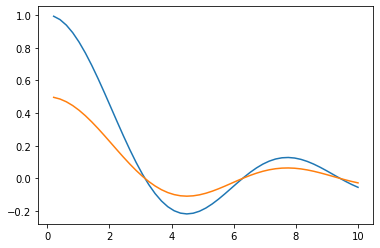

In [72]:
plt.plot(xs, [a.Eval(x) for x in xs])
plt.plot(xs, [b.Eval(x) for x in xs])